In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("credit_risk_dataset.csv")

## Data Dictionary:
#### person_age: Age of the individual applying for the loan.
#### person_income: Annual income of the individual.
#### person_home_ownership: Type of home ownership of the individual.
    rent: The individual is currently renting a property.
    mortgage: The individual has a mortgage on the property they own.
    own: The individual owns their home outright.
    other: Other categories of home ownership that may be specific to the dataset.
#### person_emp_length: Employment length of the individual in years.
#### loan_intent: The intent behind the loan application.
#### loan_grade: The grade assigned to the loan based on the creditworthiness of the borrower.
    A: The borrower has a high creditworthiness, indicating low risk.
    B: The borrower is relatively low-risk, but not as creditworthy as Grade A.
    C: The borrower's creditworthiness is moderate.
    D: The borrower is considered to have higher risk compared to previous grades.
    E: The borrower's creditworthiness is lower, indicating a higher risk.
    F: The borrower poses a significant credit risk.
    G: The borrower's creditworthiness is the lowest, signifying the highest risk.
#### loan_amnt: The loan amount requested by the individual.
#### loan_int_rate: The interest rate associated with the loan.
#### loan_status: Loan status, where 0 indicates non-default and 1 indicates default.
    0: Non-default - The borrower successfully repaid the loan as agreed, and there was no default.
    1: Default - The borrower failed to repay the loan according to the agreed-upon terms and defaulted on the loan.
#### loan_percent_income: The percentage of income represented by the loan amount.
#### cb_person_default_on_file: Historical default of the individual as per credit bureau records.
    Y: The individual has a history of defaults on their credit file.
    N: The individual does not have any history of defaults.
#### cb_preson_cred_hist_length: The length of credit history for the individual.

## Data Preparation

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [5]:
df.shape

(32581, 12)

In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [8]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [9]:
total_rows = len(df)
null_percentages = (df.isnull().sum() / total_rows) * 10
print(null_percentages)
#Percentage representation of Null values on the Dataset
#Null values for variable person_emp_length represents aprox 2.75% of the entire dataset
#Null values for variable loan_int_rate represents aprox 9.6% of the entire dataset

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64


In [10]:
df.dropna(subset=['person_emp_length'], inplace=True)
#Drop rows with missing values on variable person_emp_length

In [11]:
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(), inplace=True)
#Filling the missing values on variable loan_int_rate with the mean value of the non-Null values on the same variable

In [12]:
total_rows = len(df)
null_percentages = (df.isnull().sum() / total_rows) * 100
print(null_percentages)
#Percentage representation of Null values on the Dataset
#Null values for variable loan_int_rate represents aprox 9.6% of the entire dataset

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64


In [13]:
df.shape

(31686, 12)

In [14]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,31686.000000,3.168600e+04,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000,31686.000000
mean,27.747302,6.669188e+04,4.789686,9661.337815,11.039867,0.215426,0.169612,5.809316
std,6.360283,6.242729e+04,4.142630,6336.226458,3.070117,0.411124,0.106297,4.060867
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.939700e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.600000e+04,4.000000,8000.000000,11.039867,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.160000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Cardinality of Numerical Variables

In [15]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_columns:
    unique_values = df[col].nunique()
    print(f"Column {col} has {unique_values} unique values.")

Column person_age has 58 unique values.
Column person_income has 4130 unique values.
Column person_emp_length has 36 unique values.
Column loan_amnt has 749 unique values.
Column loan_int_rate has 349 unique values.
Column loan_status has 2 unique values.
Column loan_percent_income has 77 unique values.
Column cb_person_cred_hist_length has 29 unique values.


## Cardinality of Categorucal Variables

In [16]:
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    value_counts = df[col].value_counts()
    print(f"Column {col} has {len(value_counts)} unique values.")
    print(value_counts)
    print("\n")

Column person_home_ownership has 4 unique values.
person_home_ownership
RENT        16076
MORTGAGE    13093
OWN          2410
OTHER         107
Name: count, dtype: int64


Column loan_intent has 6 unique values.
loan_intent
EDUCATION            6290
MEDICAL              5897
VENTURE              5556
PERSONAL             5369
DEBTCONSOLIDATION    5064
HOMEIMPROVEMENT      3510
Name: count, dtype: int64


Column loan_grade has 7 unique values.
loan_grade
A    10371
B    10186
C     6321
D     3556
E      952
F      236
G       64
Name: count, dtype: int64


Column cb_person_default_on_file has 2 unique values.
cb_person_default_on_file
N    26057
Y     5629
Name: count, dtype: int64




## Grouping Ages (person_age)

In [17]:
bins = [18, 29, 39, 49, 59, 150]
#Defining age bins
labels = ['18-29', '30-39', '40-49', '50-59', '60+']
#Creating labels

In [18]:
df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=False)
#Creating a new variable 'age_group' based on the bins and labels previous defined
#This new variable can be used for further analysis

In [19]:
df.age_group.value_counts()

age_group
18-29    21213
30-39     8460
40-49     1630
50-59      294
60+         89
Name: count, dtype: int64

In [20]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,18-29
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,18-29
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,18-29
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,18-29
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,18-29


In [45]:
# people with an age between x and y
def age_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_age'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an age between {next} and {arr[i+1]}.')
        
age_group([0 ,18, 26, 36, 46, 56, 66])

print(df.shape[0])   

There are 0 people with an age between 1 and 18.
There are 17313 people with an age between 19 and 26.
There are 11529 people with an age between 27 and 36.
There are 2296 people with an age between 37 and 46.
There are 425 people with an age between 47 and 56.
There are 98 people with an age between 57 and 66.
31680


In [46]:
df = df.drop(df[df['person_age'] > 90].index, axis=0)
#dropping age above 80

In [61]:
max_ = df['person_age'].max()
min_ = df['person_age'].min()
print(f"maximum {max_}")
print(f"minimum {min_}")

maximum 84
minimum 20


## Analysing Correlation

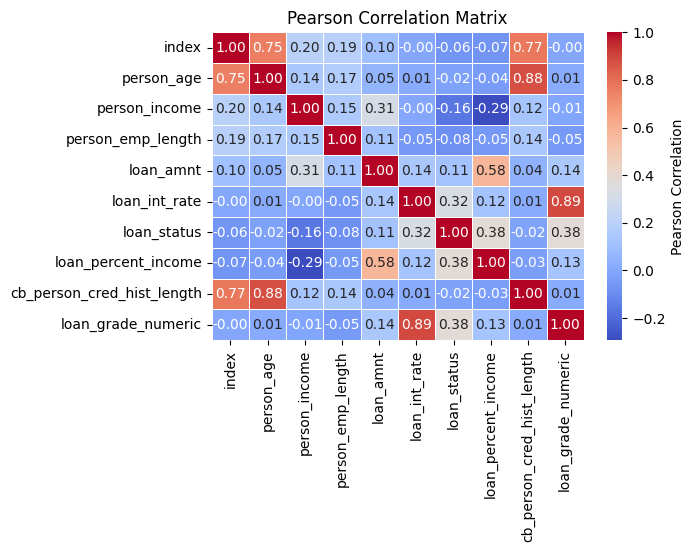

In [47]:
#Pearson Correlation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df = df[numerical_columns]
pearson_correlation_matrix = numerical_df.corr(method='pearson')
plt.figure(figsize=(6, 4))
sns.heatmap(pearson_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Pearson Correlation'})
plt.title('Pearson Correlation Matrix')
plt.show()

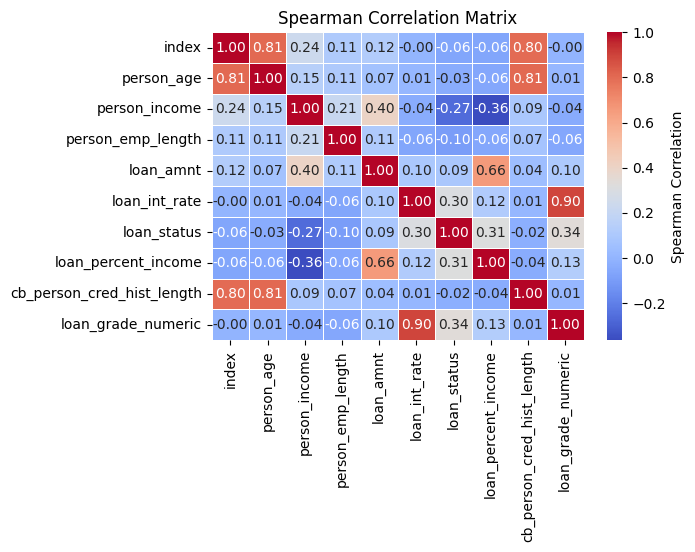

In [48]:
#Spearman Correlation
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_df02 = df[numerical_columns]
spearman_correlation_matrix = numerical_df.corr(method='spearman')
plt.figure(figsize=(6, 4))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Spearman Correlation'})
plt.title('Spearman Correlation Matrix')
plt.show()

### From the Correlation Matrix we can observe:
#### Very strong correlation between variables:
cb_person_cred_hist_length & person_age

#### Moderate correlation between variables:
loan_percent_income & loan_amnt

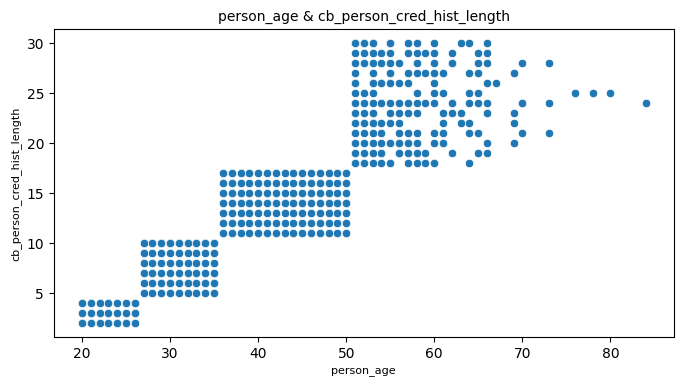

In [49]:
plt.figure(figsize=(8,4));
sns.scatterplot(data=df, x="person_age", y="cb_person_cred_hist_length")

plt.title("person_age & cb_person_cred_hist_length", fontdict={'fontsize':10});
plt.xlabel("person_age", fontdict={'fontsize' : 8});
plt.ylabel("cb_person_cred_hist_length", fontdict={'fontsize' : 8});

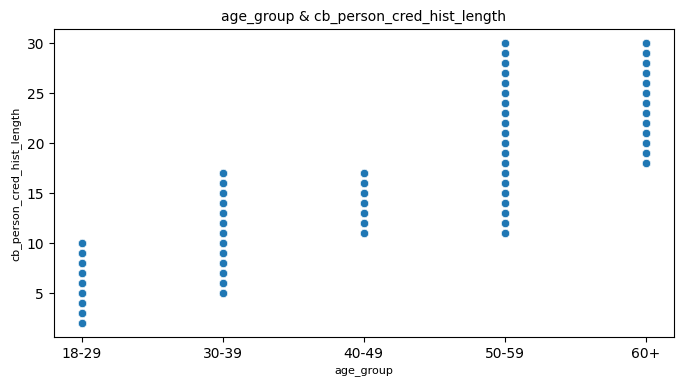

In [52]:
plt.figure(figsize=(8,4));
sns.scatterplot(data=df, x="age_group", y="cb_person_cred_hist_length")

plt.title("age_group & cb_person_cred_hist_length", fontdict={'fontsize':10});
plt.xlabel("age_group", fontdict={'fontsize' : 8});
plt.ylabel("cb_person_cred_hist_length", fontdict={'fontsize' : 8});

In [53]:
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
df['loan_grade_numeric'] = df['loan_grade'].map(grade_mapping)

<Figure size 800x600 with 0 Axes>

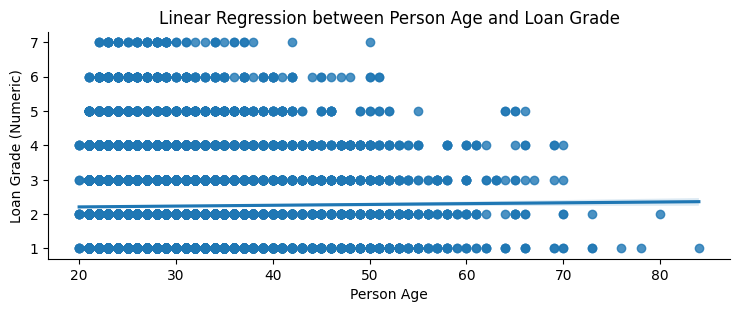

In [54]:
plt.figure(figsize=(8, 6))
sns.lmplot(x='person_age', y='loan_grade_numeric', data=df, height=3, aspect=2.5)
plt.title('Linear Regression between Person Age and Loan Grade')
plt.xlabel('Person Age')
plt.ylabel('Loan Grade (Numeric)')
plt.show()

In [ ]:
#person_age max 144 (issue)
#person_emp_length max 123 (issue)
df.reset_index(inplace = True)

<BarContainer object of 55 artists>

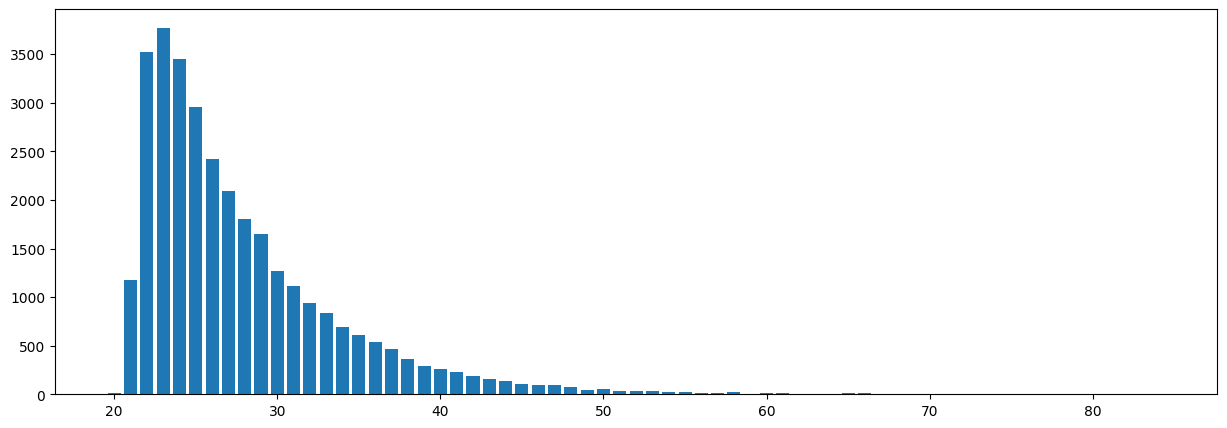

In [55]:
import matplotlib.pyplot as plt 
verti = df['person_age'].value_counts().values
hori = df['person_age'].value_counts().index
fig = plt.figure(figsize = (15, 5))
plt.bar(hori, verti)
# after 80 it is rare

# Income group 

In [64]:
max_ = df['person_income'].max()
min_ = df['person_income'].min()

print(f"maximum {max_}")
print(f"minimum {min_}")

maximum 2039784
minimum 4000


In [67]:
# people with an income between x and y
def income_group(arr):
    lenarr = len(arr)
    for i in range(0,lenarr-1):
        next = arr[i]+1
        num_people = df['person_income'].between(next,arr[i+1]).sum()
        print(f'There are {num_people} people with an income between {next} and {arr[i+1]}.')
        
income_group([0, 25000, 50000, 75000, 100000,float('inf')])

print(df.shape[0]) 

There are 2214 people with an income between 1 and 25000.
There are 11239 people with an income between 25001 and 50000.
There are 9442 people with an income between 50001 and 75000.
There are 4621 people with an income between 75001 and 100000.
There are 4164 people with an income between 100001 and inf.
31680


# Machine Learning 

Import libraries

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Data Preprocessing: Extracts features (X) and the target variable (y) from the DataFrame. The loan_status column is the target variable.
Data Splitting: Splits the dataset into training and testing sets using train_test_split from scikit-learn.

In [85]:
# Data preprocessing
# Assuming 'X' is the feature matrix and 'y' is the target variable
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Preprocessing Pipeline

This block defines the preprocessing steps using ColumnTransformer and Pipeline.
Numeric features are scaled using StandardScaler.
Categorical features are one-hot encoded using OneHotEncoder.
The ColumnTransformer combines these transformations.

In [87]:
# Define preprocessing steps
numeric_features = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length']
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_features = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

## Random Forest Model


Random Forest Model Definition: Uses scikit-learn's RandomForestClassifier within a pipeline that includes preprocessing steps.
Training the Random Forest Model: Fits the model to the training data using fit.
Making Predictions: Predicts the target variable on the test set.
Model Evaluation: Calculates accuracy, classification report, and confusion matrix for the Random Forest model.

In [89]:
# Define the Random Forest model
rf_model = Pipeline(steps=[('preprocessor', preprocessor),
                            ('classifier', RandomForestClassifier(random_state=42))])

# Train the Random Forest model
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

In [92]:
# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

# Print metrics for Random Forest
print("Random Forest Results:")
print(f'Accuracy: {rf_accuracy}')
print(f'Classification Report:\n{rf_report}')
print(f'Confusion Matrix:\n{rf_conf_matrix}')

Random Forest Results:
Accuracy: 0.9245580808080808
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      4931
           1       0.94      0.71      0.81      1405

    accuracy                           0.92      6336
   macro avg       0.93      0.85      0.88      6336
weighted avg       0.93      0.92      0.92      6336

Confusion Matrix:
[[4862   69]
 [ 409  996]]


### Random Forest Visualization

This block creates visualizations for the Random Forest model.
It displays the confusion matrix and the ROC curve with the AUC score.

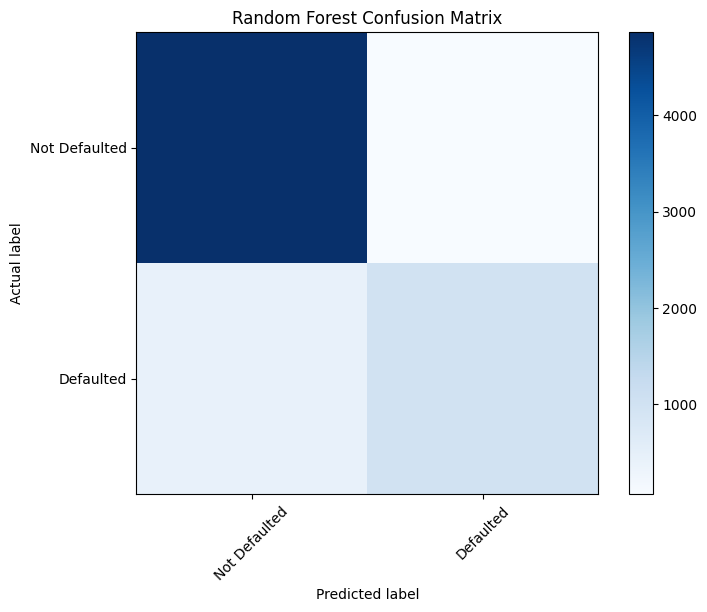

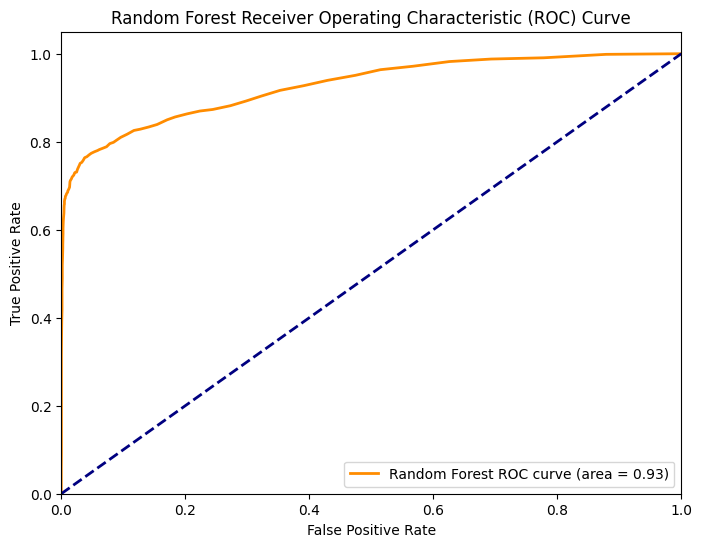

In [90]:
# Plot Confusion Matrix for Random Forest
plt.figure(figsize=(8, 6))
plt.imshow(rf_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix')
plt.colorbar()

classes = ['Not Defaulted', 'Defaulted']
tick_marks = [0, 1]
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Plot ROC Curve for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
rf_roc_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label='Random Forest ROC curve (area = {:.2f})'.format(rf_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Support Vector Machine Model

This block defines a machine learning pipeline for the Support Vector Machine (SVM) model.
The SVM model is trained on the training data.

In [93]:
# Define the SVM model
svm_model = Pipeline(steps=[('preprocessor', preprocessor),
                             ('classifier', SVC(random_state=42))])

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions with SVM
svm_y_pred = svm_model.predict(X_test)

# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

In [95]:
# Evaluate the SVM model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)

# Print metrics for SVM
print("\nSupport Vector Machine Results:")
print(f'Accuracy: {svm_accuracy}')
print(f'Classification Report:\n{svm_report}')
print(f'Confusion Matrix:\n{svm_conf_matrix}')


Support Vector Machine Results:
Accuracy: 0.9008838383838383
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4931
           1       0.93      0.60      0.73      1405

    accuracy                           0.90      6336
   macro avg       0.91      0.79      0.83      6336
weighted avg       0.90      0.90      0.89      6336

Confusion Matrix:
[[4872   59]
 [ 569  836]]


# SVM Vizualization

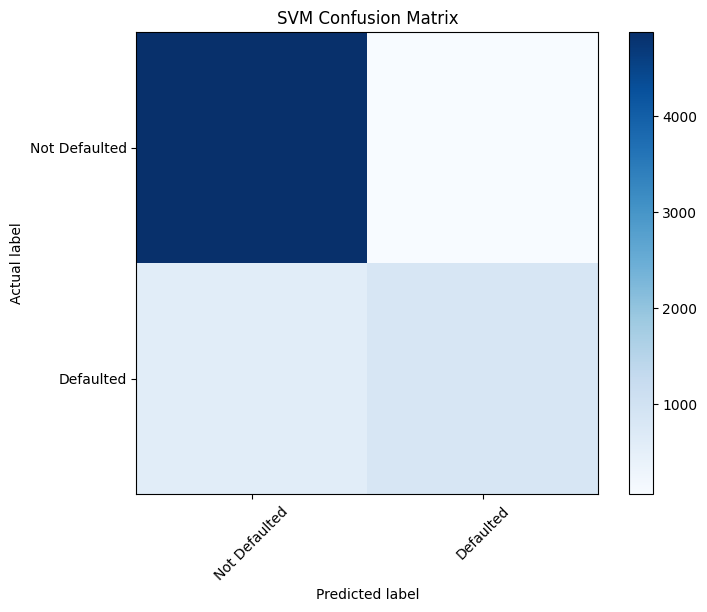

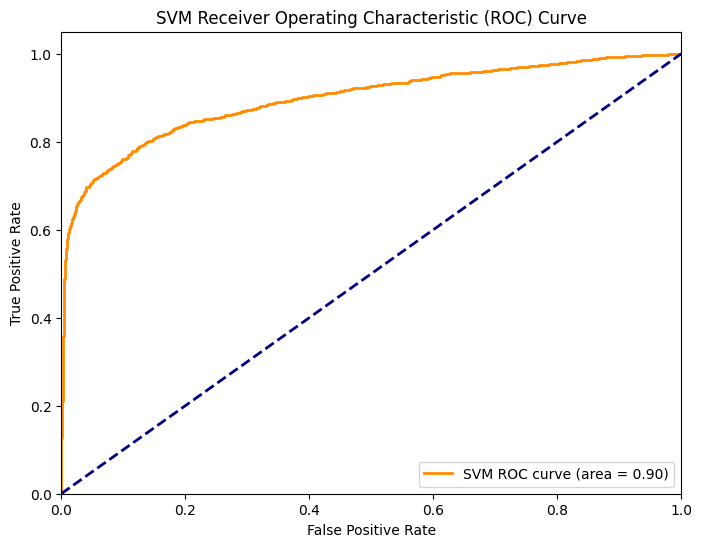

In [94]:
# Plot Confusion Matrix for SVM
plt.figure(figsize=(8, 6))
plt.imshow(svm_conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('SVM Confusion Matrix')
plt.colorbar()

plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Plot ROC Curve for SVM
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_model.decision_function(X_test))
svm_roc_auc = auc(svm_fpr, svm_tpr)

plt.figure(figsize=(8, 6))
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label='SVM ROC curve (area = {:.2f})'.format(svm_roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()